<a href="https://colab.research.google.com/github/bvdsb01/mLearning/blob/main/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import struct

def read_idx(filename):
    """Read an IDX file and return it as a NumPy array"""
    with open('/content/train-images.idx3-ubyte', 'rb') as f:
        magic_number, num_items = struct.unpack(">II", f.read(8))

        if magic_number == 2051:  # Image file
            num_rows, num_cols = struct.unpack(">II", f.read(8))
            data = np.frombuffer(f.read(), dtype=np.uint8).reshape(num_items, num_rows, num_cols)
        elif magic_number == 2049:  # Label file
            data = np.frombuffer(f.read(), dtype=np.uint8)
        else:
            raise ValueError("Invalid MNIST file!")

    return data


In [ ]:
# Paths to your MNIST dataset
train_images_path = "path/to/train-images-idx3-ubyte"
train_labels_path = "path/to/train-labels-idx1-ubyte"
test_images_path = "path/to/t10k-images-idx3-ubyte"
test_labels_path = "path/to/t10k-labels-idx1-ubyte"

# Load the data
X_train = read_idx(train_images_path)
y_train = read_idx(train_labels_path)
X_test = read_idx(test_images_path)
y_test = read_idx(test_labels_path)

print(f"Train images shape: {X_train.shape}")  # (60000, 28, 28)
print(f"Train labels shape: {y_train.shape}")  # (60000,)
print(f"Test images shape: {X_test.shape}")    # (10000, 28, 28)
print(f"Test labels shape: {y_test.shape}")    # (10000,)


Train images shape: (60000, 28, 28)
Train labels shape: (60000, 28, 28)
Test images shape: (60000, 28, 28)
Test labels shape: (60000, 28, 28)


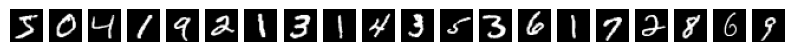

In [ ]:
import matplotlib.pyplot as plt

# # Show a sample image
# plt.imshow(X_train[0], cmap='gray')
# plt.title(f"Label: {y_train[0]}")
# plt.show()

# import matplotlib.pyplot as plt

# Set up a figure with smaller images
fig, axes = plt.subplots(1, 20, figsize=(10, 2))  # 10 images in a single row

for i in range(20):
    axes[i].imshow(X_train[i], cmap='gray')
    axes[i].axis("off")  # Hide axes for cleaner visualization

plt.show()


In [ ]:
def read_idx1(filename):
    """Read an IDX1 label file and return a NumPy array."""
    with open('/content/train-labels.idx1-ubyte', 'rb') as f:
        magic, num_labels = struct.unpack(">II", f.read(8))
        labels = np.frombuffer(f.read(), dtype=np.uint8)
    return labels

# Example usage
train_labels = read_idx1("train-labels-idx1-ubyte")
print(train_labels.shape)  # (60000,)
print(train_labels)


(60000,)
[5 0 4 ... 5 6 8]


In [ ]:
import numpy as np
import struct
import random

def read_idx_images(filename):
    """Reads an IDX3 image file and returns a NumPy array of shape (num_images, 28, 28)."""
    with open(filename, 'rb') as f:
        magic, num_images, rows, cols = struct.unpack(">IIII", f.read(16))  # Read header
        images = np.frombuffer(f.read(), dtype=np.uint8).reshape(num_images, rows, cols)  # Read images
    return images

def read_idx_labels(filename):
    """Reads an IDX1 label file and returns a NumPy array of shape (num_images,)."""
    with open(filename, 'rb') as f:
        magic, num_labels = struct.unpack(">II", f.read(8))  # Read header
        labels = np.frombuffer(f.read(), dtype=np.uint8)  # Read labels
    return labels

def extract_samples(images, labels, classes=[0, 1, 2], num_samples=100):
    """
    Extracts a fixed number of samples per class.

    Parameters:
    - images: NumPy array of shape (num_images, 28, 28)
    - labels: NumPy array of shape (num_images,)
    - classes: List of digit classes to filter (default: [0, 1, 2])
    - num_samples: Number of images to extract per class

    Returns:
    - sampled_images: NumPy array of shape (num_samples * len(classes), 28, 28)
    - sampled_labels: NumPy array of shape (num_samples * len(classes),)
    """
    sampled_images = []
    sampled_labels = []

    for digit in classes:
        indices = np.where(labels == digit)[0]  # Get all indices for this digit
        selected_indices = np.random.choice(indices, num_samples, replace=False)  # Randomly select num_samples

        sampled_images.append(images[selected_indices])  # Add images
        sampled_labels.append(labels[selected_indices])  # Add labels

    # Convert lists to NumPy arrays
    sampled_images = np.vstack(sampled_images)
    sampled_labels = np.concatenate(sampled_labels)

    return sampled_images, sampled_labels

# File paths for train and test data
train_images_file = "/content/train-images.idx3-ubyte"  # Update with correct path
train_labels_file = "/content/train-labels.idx1-ubyte"  # Update with correct path
test_images_file = "/content/t10k-images.idx3-ubyte"  # Update with correct path
test_labels_file = "/content/t10k-labels.idx1-ubyte"  # Update with correct path

# Step 1: Read train and test images and labels
X_train_full = read_idx_images(train_images_file)
y_train_full = read_idx_labels(train_labels_file)
X_test_full = read_idx_images(test_images_file)
y_test_full = read_idx_labels(test_labels_file)

# Step 2: Extract 100 samples per class (0, 1, 2) from both train and test sets
X_train, y_train = extract_samples(X_train_full, y_train_full, classes=[0, 1, 2], num_samples=100)
X_test, y_test = extract_samples(X_test_full, y_test_full, classes=[0, 1, 2], num_samples=100)

# Output dataset shapes
print(f"Train X shape: {X_train.shape}")  # Should be (300, 28, 28)
print(f"Train y shape: {y_train.shape}")  # Should be (300,)
print(f"Test X shape: {X_test.shape}")    # Should be (300, 28, 28)
print(f"Test y shape: {y_test.shape}")    # Should be (300,)")


Train X shape: (300, 28, 28)
Train y shape: (300,)
Test X shape: (300, 28, 28)
Test y shape: (300,)


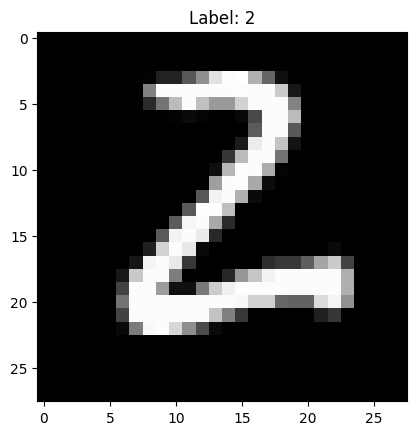

In [54]:
plt.imshow(X_test[299], cmap='gray')
plt.title(f"Label: {y_test[299]}")
plt.show()